In [65]:
import seaborn as sns
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# create column names
df2 = pd.read_csv("drug_consumption.csv", 
                  names=["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstacy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"])

df2.info()
pd.DataFrame.head(df2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caff       1885 non-null   object 
 17  Canabis    1885 non-null   object 
 18  Choc       1885 non-null   object 
 19  Coke       1885 non-null   object 
 20  Crack   

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [66]:
arr = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstacy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
# remove CL and convert strings to ints
for i in range(0,18):
    df2[arr[i]].replace({"CL0": "0", "CL1": "1", "CL2": "2", "CL3": "3", "CL4": "4", "CL5": "5", "CL6": "6"}, inplace=True)
    df2[arr[i]] = pd.to_numeric(df2[arr[i]])

In [67]:
# one-hot encoding for a column (from discussion 10-8 code)
def one_hot_encoding(colname):
    # convert to an array
    col_arr = array(df2[colname])
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
    # reshape the array
    col_arr = col_arr.reshape(len(col_arr), 1) 
    onehot_encoded_arr = onehot_encoder.fit_transform(col_arr)
    return(onehot_encoded_arr)

In [68]:
# call the function one_hot_encoding() for each column you want encoded
encoded_xtc = one_hot_encoding("Ecstacy")
print(encoded_xtc)

encoded_alc = one_hot_encoding("Alcohol")
print(encoded_alc)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


<AxesSubplot:>

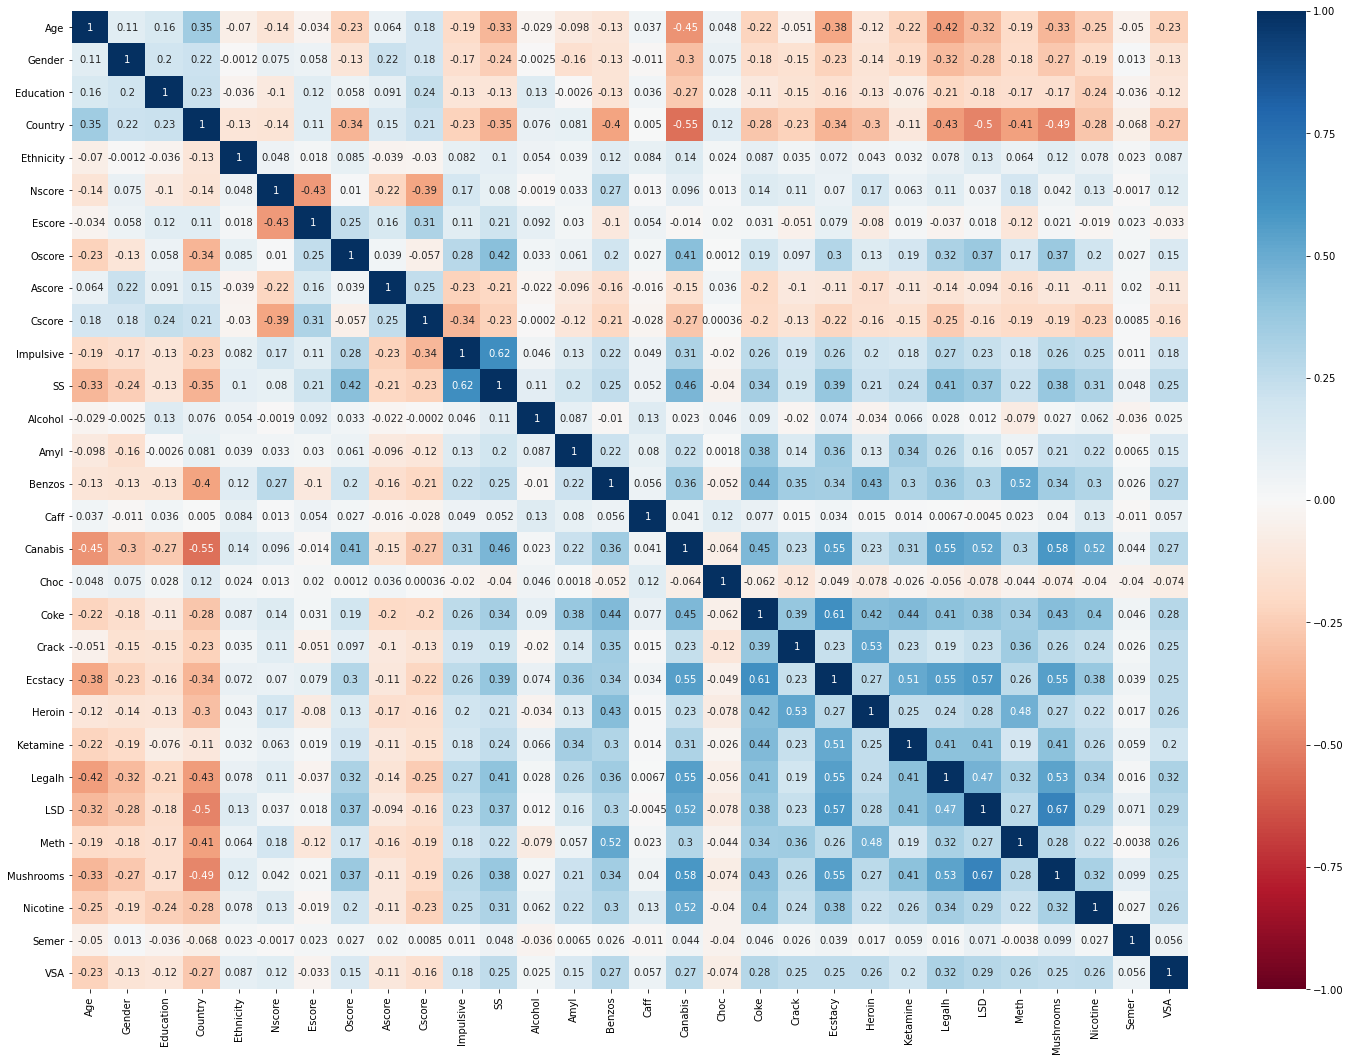

In [7]:
# make size of heatmap bigger
plt.figure(figsize=(25,18))
# generate pearson correlation matrix plot in form of heatmap
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='RdBu')

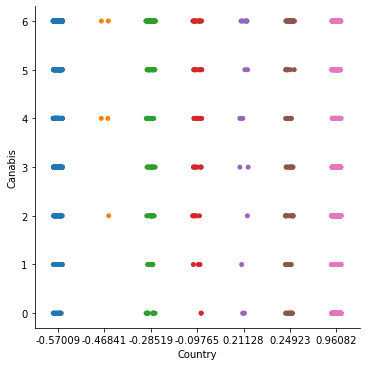

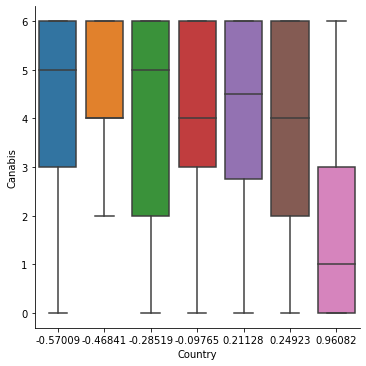

In [74]:
sns.catplot(x="Country", y="Canabis", data=df2)
sns.catplot(x="Country", y="Canabis", kind="box", data=df2)